Using Neural Networks

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv('data.csv')

In [27]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [28]:
df.shape

(569, 33)

In [29]:
df=df.dropna(axis=1)

In [30]:
df.shape

(569, 32)

In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1]= labelencoder_Y.fit_transform(df.iloc[:,1].values)
print(labelencoder_Y.fit_transform(df.iloc[:,1].values))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [32]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
from keras.models import Sequential
from keras.layers import Dense

In [34]:
classifier = Sequential()

In [35]:
classifier.add(Dense(units=16, activation='relu',input_dim = 31))
classifier.add(Dense(units=8, activation='relu'))
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [36]:
classifier.compile(optimizer = 'rmsprop',loss='binary_crossentropy')

In [37]:
y = df['diagnosis']

In [38]:
type(y)

pandas.core.series.Series

In [39]:
x = df.drop(['diagnosis'],axis=1)

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=314)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [42]:
x_train.shape

(381, 31)

In [43]:
x_train = x_train.reshape(-1,31)

In [44]:
x_train.shape

(381, 31)

In [45]:
history=classifier.fit(x_train,y_train,batch_size = 1,epochs=100,verbose=1)

Epoch 1/100
381/381 [==============================] - 2s 3ms/step - loss: 0.4229
Epoch 2/100
381/381 [==============================] - 1s 2ms/step - loss: 0.2133
Epoch 3/100
381/381 [==============================] - 1s 3ms/step - loss: 0.0979
Epoch 4/100
381/381 [==============================] - 1s 3ms/step - loss: 0.0820
Epoch 5/100
381/381 [==============================] - 1s 3ms/step - loss: 0.0787
Epoch 6/100
381/381 [==============================] - 1s 2ms/step - loss: 0.0822
Epoch 7/100
381/381 [==============================] - 1s 2ms/step - loss: 0.0720
Epoch 8/100
381/381 [==============================] - 1s 2ms/step - loss: 0.0805
Epoch 9/100
381/381 [==============================] - 1s 2ms/step - loss: 0.0819
Epoch 10/100
381/381 [==============================] - 1s 2ms/step - loss: 0.0777
Epoch 11/100
381/381 [==============================] - 1s 2ms/step - loss: 0.0802
Epoch 12/100
381/381 [==============================] - 1s 2ms/step - loss: 0.0783
Epoch 13/100


In [46]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                512       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 6)                 54        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________


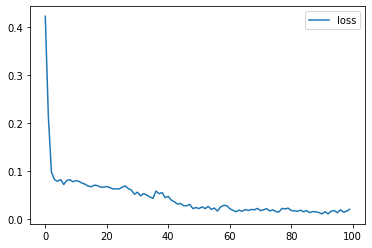

In [49]:
history_df=pd.DataFrame.from_dict(history.history)
history_df[['loss']].plot()

In [50]:
y_pred = classifier.predict(x_test)

6/6 [==============================] - 0s 2ms/step


In [51]:
y_pred = [1 if y>=0.5 else 0 for y in y_pred]

In [52]:
y_test.shape

(188,)

In [53]:
new = y_test.values.reshape(1,188)

In [54]:
total = 0
correct = 0
wrong = 0
for i in y_pred:
  total=total+1
  if (new[0,i] == y_pred[i]):
    correct=correct+1
  else:
    wrong=wrong+1
print("Total :"+str(total))
print("Correct Predictions :"+str(correct))
print("Wrong Predictions :"+str(wrong))

Total :188
Correct Predictions :188
Wrong Predictions :0
